In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Empirical Distributions##

 Empirical distributions of many draws of chance events approximate the probability distribution for that event.

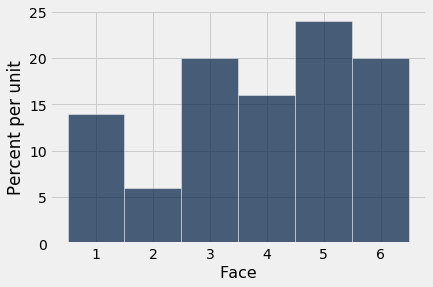

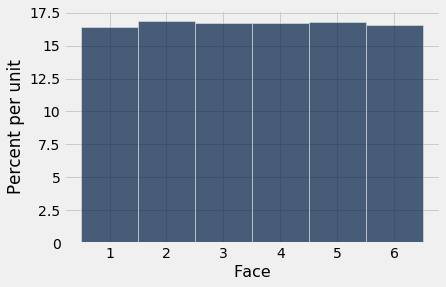

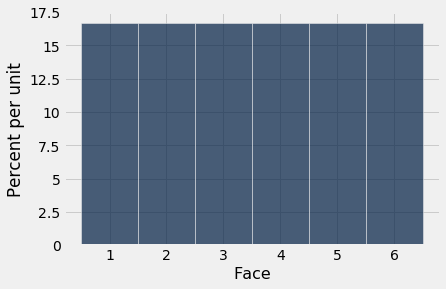

In [3]:
die = Table().with_column('Face', np.arange(1, 7))
die_bins = np.arange(0.5,7,1)
die.sample(50).hist('Face',bins=die_bins)
die.sample(50000).hist('Face',bins=die_bins)
die.hist('Face',bins=die_bins)

## Swain vs. Alabama ##

In [4]:
population_proportions = make_array(.26, .74) 
population_proportions

array([0.26, 0.74])

In [5]:
sample_proportions(100, population_proportions)

array([0.29, 0.71])

In [11]:
def simulated_panel_proportion():
    one_panel_distribution = sample_proportions(100, population_proportions)
    panel_proportion = one_panel_distribution.item(0)
    return panel_proportion

In [28]:
simulated_panel_proportion()

0.31

In [30]:
results = make_array()

for i in np.arange(10000):
    one_result = simulated_panel_proportion()
    results = np.append(results, one_result)

In [31]:
results

array([0.26, 0.15, 0.26, ..., 0.25, 0.25, 0.25])

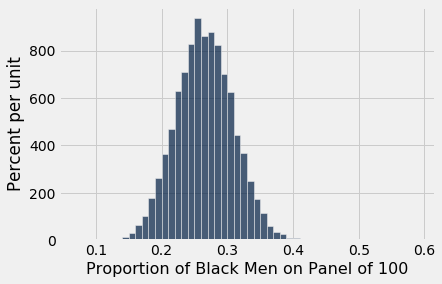

In [33]:
panel_bins = np.arange(0.07,0.6,0.01)
Table().with_column('Proportion of Black Men on Panel of 100', results).hist('Proportion of Black Men on Panel of 100',
                                                                            bins = panel_bins)


## Mendel and Pea Flowers ##

In [34]:
predicted_proportions = make_array(.75, .25)

In [35]:
#Mendel had 929 plants
sample_proportions(929, predicted_proportions)

array([0.74488698, 0.25511302])

In [37]:
def purple_percents_distance():
    simulated_percents = sample_proportions(929, predicted_proportions) * 100
    simulated_purple_percent = simulated_percents.item(0)
    return abs(75 - simulated_purple_percent)

In [48]:
purple_percents_distance()

1.4262648008611478

In [49]:
purple_percents = make_array()

for i in np.arange(10000):
    one_statistic = purple_percents_distance()
    purple_percents = np.append(purple_percents, one_statistic)

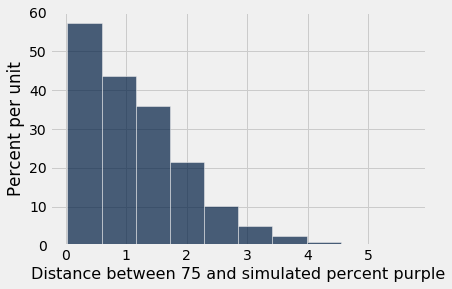

In [50]:
Table().with_columns('Distance between 75 and simulated percent purple', purple_percents).hist('Distance between 75 and simulated percent purple')

In [51]:
## Mendel had 929 plants, of which 705 had purple flowers
abs(((705 / 929) * 100) - 75)

0.8880516684607045